# Assignment sheet 3: Numerical Computation and Prinicipal Component Analysis (Deadline: Nov 24, 23:59)

### Computational Issues with Softmax $~$ (3 points)

In the lecture you were introduced to the softmax function which is used to generate probabilities corresponding to the output labels. Typically, the input to the softmax function is a vector of numerical values over the labels and the output is a vector(of same dimension as the input vector) of corresponding probabilities.
**Softmax function is given by,** $~$
$$Softmax(x)_i = \frac{exp(x_i)}{\sum_{j=1}^n exp(x_j)}$$

**Numerical issues might occur when computing softmax functions on a computer which can perform computations
only upto a certain precision.** [Suggested reading $-$ [chapter 4.1 of DeepLearningBook](http://www.deeplearningbook.org/contents/numerical.html)]

$1$. Name the numerical these numerical issues and explain them. ($1$ points)

$2$. Suggest a remedy(with explanation on why it works) to overcome these numerical issues occuring with Softmax computation. Prove that this remedy actually does not change the softmax criteria. Describe a situation where the proposed remedy still fails to remove instability. ($1$ point)

$3$. First write a naive Softmax implementation, in numpy, that can produce numerical instability. Then write a modified Softmax implementation which is numerically stable.  ($0.5 + 0.5 = 1$ points)

In [1]:
from IPython.display import Image
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/Softmax.jpeg?raw=true')

In [2]:
import numpy as np

# TODO : Define inputs

# Change the range of the inputs to witness overflow and underflow
# Showing softmax with two input ranges, one will have correct estimate, other will cause overflow and underflow.
inputs_1 = np.random.randint(-2**6,2**6,50)
inputs_2 = np.random.randint(-2**10,2**10,50)

def softmax_naive(inputs):
    """Unstable Softmax function"""
    
    # TODO : Implement
    denom = np.sum(np.exp(inputs))
    sm_out = np.array([])
    for i in inputs:
        num = np.exp(i)
        val = num / denom
        sm_out = np.append(sm_out,val)
    return sm_out
    pass


def softmax_modified(inputs):
    """Stable Softmax function"""
    
    # TODO : Implement
    max_elem = np.amax(inputs)
    # Normalizing
    mod_inputs = inputs - max_elem
    denom = np.sum(np.exp(mod_inputs))
    sm_out = np.array([])
    for z in mod_inputs:
        num = np.exp(z)
        val = num/denom
        sm_out = np.append(sm_out, val)
    return sm_out
    pass
# Calling the softmax functions
print("Inputs_1:",inputs_1)
print("Naive Softmax:",softmax_naive(inputs_1))
print("Modified Softmax:",softmax_modified(inputs_1))

print("Inputs_2:",inputs_2)
print("Naive Softmax:",softmax_naive(inputs_2))
print("Modified Softmax:",softmax_modified(inputs_2))

Inputs_1: [ 20 -58 -25  -2  -8  62   1  22 -50  18 -13 -55   7  47 -29 -57 -18  22
 -30  16 -36  23  -7   8  26  54 -34  23  19 -17 -29  60   3  59   5  46
 -27 -35 -28  15  -3 -23 -63 -31 -20  18   0 -39  43  10]
Naive Softmax: [  4.85004202e-19   6.46808789e-53   1.38833354e-38   1.35290375e-28
   3.35351310e-31   8.43555654e-01   2.71737981e-27   3.58372325e-18
   1.92810983e-49   6.56381810e-20   2.25957936e-33   1.29915018e-51
   1.09626926e-24   2.58045632e-07   2.54282158e-40   1.75820858e-52
   1.52249259e-35   3.58372325e-18   9.35451780e-41   8.88316182e-21
   2.31875314e-43   9.74156980e-18   9.11579373e-31   2.97996881e-24
   1.95664660e-16   2.82981397e-04   1.71333970e-42   9.74156980e-18
   1.78423075e-19   4.13856395e-35   2.54282158e-40   1.14162843e-01
   2.00788719e-26   4.19981630e-02   1.48363911e-25   9.49296830e-08
   1.87890513e-39   6.30302452e-43   6.91210568e-40   3.26793260e-21
   4.97705474e-29   1.02584744e-37   4.35816334e-55   3.44133478e-41
   2.0604696

/Users/mariusmosbach/miniconda3/envs/nnia/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  
/Users/mariusmosbach/miniconda3/envs/nnia/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
/Users/mariusmosbach/miniconda3/envs/nnia/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


**Points**: 3.0 of 3.0
**Comments**
- None

### Principal Component Analysis $~$ (7 points)

$4$. Is PCA supervised or unsupervised, logically explain your answer. Which is the tunable parameter in PCA?
Briefly explain the role of this parameter in PCA.  ($1+0.5+0.5 = 2$ points)

$5.a$. Consider the following data:

setA: ${\bf x}^{(1)}$=$(2, 4)^T$, ${\bf x}^{(2)}$=$(2, 2)^T$, ${\bf x}^{(3)}$=$(3, 1)^T$, ${\bf x}^{(4)}$=$(5, 1)^T$ 

setB: ${\bf x}^{(1)}$=$(-1, 1)^T$, ${\bf x}^{(2)}$=$(-2, 2)^T$, ${\bf x}^{(3)}$=$(-1, 3)^T$, ${\bf x}^{(4)}$=$(-1, 4)^T$

Compress the above sets of vectors into a one-dimensional set using PCA, i.e., derive the encoder function $f(x)=D^{T}.x$ as defined in the lecture. Then apply f to the datasets inorder to compress them. ($1.5 + 1.5$ points)

$5.b$. For both the above sets sketch the corresponding datasets in a separate figure. Also include the reconstructed vectors into the corresponding figures.                                                             ($2$ points)

In [3]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/PCA1.jpeg?raw=true')

In [4]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/PCA2.jpeg?raw=true')

In [5]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/PCA3.jpeg?raw=true')

In [6]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/PCA4.jpeg?raw=true')

**Points**: 7.0 of 7.0
**Comments**:
- Please try to use matplotlib for the plotting part next time.
- You find a link to a nice introduction and some advises for using it [here](https://github.com/mmarius/nnia-tutorial/blob/master/assignment-3/tutorial3-marius.ipynb)

### Gradient descent and Newton's method $~$ (5 points)

** Suppose $f(x) = 2x^3 - 5x + 6$ **

$6$. Write down the mathematical expressions for minimizing f(x) using Gradient descent(GD) and then using Newton's Method(NM). $~$ ($1$ points)

$7$. Report the updated values of x, both for GD and NM, at $x = 0$. what do you observe? $~$ ($1$ points)

In [7]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNIAAssignment3_1.jpg?raw=true')

In [8]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNIAAssignment3_2.jpg?raw=true')

**Points**: 2.0 of 2.0
**Comments**:
- None

$8$. Perform GD and NM for the above function using Tensorflow $~$ ($1.5 + 1.5$ points)

In [9]:
import numpy as np
import tensorflow as tf

# TODO : Implement Gradient Descent with Tensorflow
x = tf.Variable(2, name='x', dtype=tf.float32)
f_x = 2*x**3 - 5*x + 6

optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(f_x)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print ("Starting at x:", float(sess.run(x)),"f(x):",float(sess.run(f_x)))
    x_prev = float(sess.run(x))
    for step in range(50):
        sess.run(train)
        print("Step:",step+1,"x:",float(sess.run(x)),"f(x):",float(sess.run(f_x)))
        # Keeping an additional condition here to break out of we converge below a certain threshold
        if abs(x_prev - float(sess.run(x))) < 0.00000001:
            break
        x_prev = float(sess.run(x))
        #print("NOW:",x_prev)

Starting at x: 2.0 f(x): 12.0
Step: 1 x: 1.0499999523162842 f(x): 3.0652496814727783
Step: 2 x: 0.9692500233650208 f(x): 2.974865436553955
Step: 3 x: 0.9374163150787354 f(x): 2.9604265689849854
Step: 4 x: 0.9237915277481079 f(x): 2.9577527046203613
Step: 5 x: 0.9177742600440979 f(x): 2.957228660583496
Step: 6 x: 0.9150813817977905 f(x): 2.9571235179901123
Step: 7 x: 0.9138692021369934 f(x): 2.9571022987365723
Step: 8 x: 0.9133221507072449 f(x): 2.9570980072021484
Step: 9 x: 0.9130749702453613 f(x): 2.957097053527832
Step: 10 x: 0.9129632115364075 f(x): 2.957097053527832
Step: 11 x: 0.9129126667976379 f(x): 2.957097053527832
Step: 12 x: 0.9128897786140442 f(x): 2.957097053527832
Step: 13 x: 0.912879467010498 f(x): 2.957097053527832
Step: 14 x: 0.9128748178482056 f(x): 2.957097053527832
Step: 15 x: 0.9128726720809937 f(x): 2.957096815109253
Step: 16 x: 0.9128717184066772 f(x): 2.957096815109253
Step: 17 x: 0.9128713011741638 f(x): 2.957097053527832
Step: 18 x: 0.9128710627555847 f(x): 2.

In [10]:
import numpy as np
import tensorflow as tf

# TODO : Implement Newton's Method with Tensorflow
x = tf.Variable(2, name='x', dtype=tf.float32)
f_x = 2*x**3 - 5*x + 6

deriv1 = tf.gradients(f_x, x)
deriv2 = tf.gradients(deriv1, x)

optimizer = x - (tf.div(deriv1,deriv2))
assign_x = x.assign(optimizer[0])

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print ("Starting at x:", float(sess.run(x)),"f(x):",float(sess.run(f_x)))
    x_prev = float(sess.run(x))
    for step in range(30):
        sess.run(optimizer)
        x_val = sess.run(assign_x)
        print("Step:",step+1,"x:",float(x_val),"f(x):",float(sess.run(f_x)))
        # Keeping an additional condition here to break out of we converge below a certain threshold
        if abs(x_prev - float(sess.run(x))) < 0.00000001:
            break
        x_prev = float(x_val)

Starting at x: 2.0 f(x): 12.0
Step: 1 x: 1.2083332538604736 f(x): 3.4868345260620117
Step: 2 x: 0.9489941596984863 f(x): 2.9643383026123047
Step: 3 x: 0.9135584235191345 f(x): 2.957099676132202
Step: 4 x: 0.9128711819648743 f(x): 2.957097053527832
Step: 5 x: 0.9128709435462952 f(x): 2.957096576690674
Step: 6 x: 0.9128709435462952 f(x): 2.957096576690674


**Points**: 2.0 of 3.0
**Comments**:
- You should implement the gradient descent update rule yourself and not use the predefined optimizer from TensorFlow. Similar as you did for Newtons method. 

### Gradient descent computation and visualisation $~$ (3 + 2 points)

#### Now visualize the Gradient Descent algorithm to fit a straight line to a data generated using  $y = \theta_{true}x$ $~$, i.e., use this expression to first produce the data (see code below the lines starting with m=20 and following) and then try to fit a straight line to this data. Fitting a straight line means that you have to approximate this $\theta_{true}$ parameter using the hypothesis or predictive model by minimizing the cost function defined below.

**For this task you should minimize a cost function of the form:**
$$\frac{1}{2m}\sum_{i=1}^m [h_{\theta}(x^i)-y^i]^2$$
where,
$x^i$ is the $i^{th}$ input 

$y^i$ is the true $i^{th}$ response or output

$h_{\theta}(x)$ is the hypothesis or predictive model

#### Assume $~$ $h_{\theta}(x) = \theta x$ $~$ to be the hypothesis or predictive model

[  9.02631579e-02   8.40578487e-02   7.80735001e-02   7.23101120e-02
   6.67676845e-02   6.14462176e-02   5.63457112e-02   5.14661654e-02
   4.68075802e-02   4.23699555e-02   3.81532914e-02   3.41575878e-02
   3.03828449e-02   2.68290625e-02   2.34962406e-02   2.03843793e-02
   1.74934786e-02   1.48235384e-02   1.23745588e-02   1.01465398e-02
   8.13948136e-03   6.35338346e-03   4.78824613e-03   3.44406936e-03
   2.32085315e-03   1.41859751e-03   7.37302440e-04   2.76967930e-04
   3.75939850e-05   1.91806046e-05   2.21727789e-04   6.45235538e-04
   1.28970385e-03   2.15513273e-03   3.24152217e-03   4.54887218e-03
   6.07718275e-03   7.82645389e-03   9.79668559e-03   1.19878779e-02
   1.44000307e-02   1.70331441e-02   1.98872180e-02   2.29622526e-02
   2.62582477e-02   2.97752033e-02   3.35131195e-02   3.74719963e-02
   4.16518337e-02   4.60526316e-02]
0.494950522338


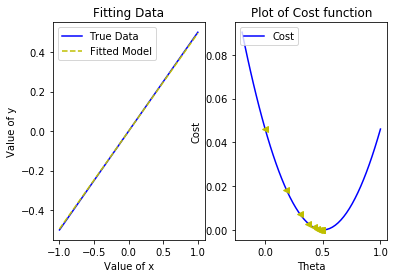

In [16]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Generate the true data which is to be fitted
m = 20                      # number of data points for x
theta_true = 0.5            # corresponds to the true slope
x = np.linspace(-1,1,m)     # x values or inputs
y = theta_true * x          # True response


# Create a subplot window
# On the left window plot the true data and the approximation 
# that you obtain with different estimates of the slope theta_true
# and on the right window plot the cost function 

# TODO : Create the subplot window
fig, ax = plt.subplots(1,2)
plt.figure(figsize=(1,1))

def hypothesis(x, theta):
    """Our "hypothesis or predictive model", a straight line through the origin."""
    
    # TODO : Implement
    y = theta * x
    return y
    pass

def cost_func(theta):
    """The cost function describing the goodness of fit."""  
    """
    cost_func = (1/2m)*summ(abs(y_true - y)) 
    """
    # TODO : Implement
    err = np.array([])
    for t in theta:
        pred_y = hypothesis(x, t)
        e = (1/(2*m)) * np.sum((pred_y - y)**2)
        err = np.append(err,e)
    return err
    pass


# First construct a grid of theta parameter and their corresponding
# cost function values.
theta_grid = np.linspace(-0.2,1,50)
# Find the cost function values to be stored in J_grid
# TODO : Create J_grid
J_grid = cost_func(theta_grid)
print(J_grid)
# Plot the cost function as a function of theta.
# TODO : Do the plot
ax[1].plot(theta_grid, J_grid, ls = '-', color='blue', label='Cost')
ax[1].legend(loc='upper left')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta = 0.
N = 10
alpha = 1
# this is just a starting value of alpha, 
# you must consider different values of alpha (try using large values)
# and redo the steps below to generate different plots
theta = [0]
# Compute the N steps down the steepest gradient
# TODO

for i in range(N):
    pred_y = hypothesis(x, theta[-1])
    diff = (pred_y - y)
    p = (diff * x)
    grad = (1/m) * np.sum(p)
    new_theta = theta[-1] - (alpha * grad)
    theta.append(new_theta)
print (theta[-1])
costs = list(cost_func(np.array(theta)))
# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window of the subplot in a matching colour.
# TODO
ax[1].plot(theta, costs, 'y<')

ax[0].plot(x,y,ls='-',color='blue',label='True Data')
ax[0].plot(x,hypothesis(x,theta[-1]), 'y--',label='Fitted Model')
# Put the labels, titles and a legend.
# TODO
ax[0].legend(loc='upper left')
ax[0].set_title('Fitting Data')
ax[0].set_xlabel('Value of x')
ax[0].set_ylabel('Value of y')

ax[1].legend(loc='upper left')
ax[1].set_title('Plot of Cost function')
ax[1].set_xlabel('Theta')
ax[1].set_ylabel('Cost')

#### Now assume that the data is generated using  $y = \theta_1x + \theta_0$
** Following the same logic you applied for the above task define a predictive model 
and perform 5 steps of gradient descent with learning rate alpha = 0.7 **

Theta0: [0, 1.3999999999999997, 1.8199999999999998, 1.946, 1.9838, 1.9951399999999999]
Theta1: [0, 0.12894736842105253, 0.22463988919667577, 0.29565381250911205, 0.34835361875676213, 0.38746242234054451]


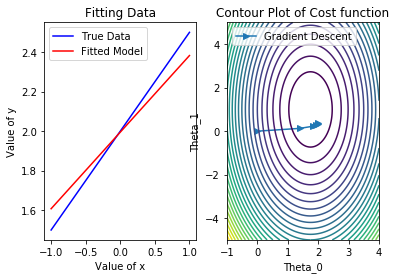

In [17]:
# Generate the true data which is to be fitted
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# Create the sub-plot: left window is the data, right window will be the cost function.
# TODO
fig, ax = plt.subplots(1,2)
plt.figure(figsize=(1,1))

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    
    # TODO : Implement
    pred_y = theta1 * x + theta0
    return pred_y
    pass

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    costs = []
    # TODO : Implement
    for t0 in (theta0):
        e1 = []
        for t1 in theta1:
            pred_y = hypothesis(x, t0, t1)
            err = (1/2*m) * np.sum((pred_y - y)**2)
            e1.append(err)
        costs.append(e1)
    return costs
    pass


# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
# Compute the cost function values
# TODO
J_cost = cost_func(theta0_grid, theta1_grid)
#print(J_cost)
# Do a labeled contour plot for the cost function on right window of the above subplot
# TODO 

ax[1].contour(theta0_grid, theta1_grid, J_cost,30)

# Take 5 steps with learning rate alpha = 0.7 down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
# TODO

alpha = 0.7
theta0, theta1 = [0], [0]


for i in range(5):
    y_pred = hypothesis(x, theta0[-1], theta1[-1])
    dif = (y_pred - y)
    th0_grad = (1/m) * np.sum(dif)
    th1_grad = (1/m) * np.sum(x*dif)
    theta0.append(theta0[-1] - alpha*th0_grad)
    theta1.append(theta1[-1] - alpha*th1_grad)
print ('Theta0:',theta0)
print ('Theta1:',theta1)
# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the left window in a matching colour.
# TODO
ax[0].plot(x, y,'b',label='True Data')
ax[0].plot(x,hypothesis(x,theta0[-1],theta1[-1]),'r',label='Fitted Model')
ax[1].plot(theta0,theta1,zorder=1,linestyle='solid', marker='>',label='Gradient Descent')

# Put the labels, titles and a legend.
# TODO

ax[0].legend(loc='upper left')
ax[0].set_title('Fitting Data')
ax[0].set_xlabel('Value of x')
ax[0].set_ylabel('Value of y')

ax[1].legend(loc='upper left')
ax[1].set_title('Contour Plot of Cost function')
ax[1].set_xlabel('Theta_0')
ax[1].set_ylabel('Theta_1')

**Points**: 5.0 of 5.0
**Comments**:
- None

### Linear Algebra Bonus
***[Additional material - Linear Algebra Basics](http://www.cs.ubc.ca/~schmidtm/Documents/2009_Notes_LinearAlgebra.pdf)***

#### Trace of a Matrix $~$ (3 points)
***[Reading material on Trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)***

Prove that the trace of a ***symmetric positive definite*** matrix is the sum of its eigenvalues.    ($0.5$ points)

Suppose Y is a mxn matrix with ***$m \leq n$ and has full rank***, then

a.   Give the rank of Y.                                                                 ($0.5$ points)

b.  Show that trace of $Y^{T}(Y^TY)^{-1}Y$ = rank(Y)                                     ($1$ points)

c. Prove that $Y^{T}(Y^TY)^{-1}Y$ is the projection matrix w.r.t space defined by Y.     ($1$ points)


In [13]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNIA3_Bonus_3.jpg?raw=true')

**Points**: 0.5 of 3.0
**Comments**:
- None

#### Jacobian $~$ (3 points)

***[Reading material on Jacobian](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)***

Show that the Jacobian determinant of $\frac{\partial(fg, h)}{\partial(u, v)}$ is equal to $\frac{\partial(f, h)}{\partial(u, v)}g + f\frac{\partial(g, h)}{\partial(u, v)}$,

where f,g,h are functions of u and v(i.e., f(u,v), g(u,v), h(u,v))   ($3$ points)

Hint: Use the property $\frac{\partial(y, x)}{\partial(u, v)} = \frac{\partial(y)}{\partial(u)}\frac{\partial(x)}{\partial(v)}-\frac{\partial(y)}{\partial(v)}\frac{\partial(x)}{\partial(u)}$

#### Hessian $~$ (2 points)
***[Reading material on Hessian](https://en.wikipedia.org/wiki/Hessian_matrix)***

$M=\left[\begin{array}{cccc}
   5 & 1 & 0 & 1\\
   1 & 4 & 1 & 0\\
   0 & 1 & 3 & 1\\
   1 & 0 & 1 & 2\\
  \end{array}\right]$
  
denote the Hessian matrix, a particular point, for a functional.

a. What properties of the functional can you infer from the above information.(give mathematical reasons) ($1$ point)

b. Provide a generic mathematical representation(e.g. generic representation of a straight line is $ax+by+c=0$) for the above functional. ($1$ point)

In [14]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNIA3_Bonus_1.jpg?raw=true')

In [15]:
Image(url='https://github.com/jojoayan1992/SaarlandUniversityNeuralNetworks/blob/master/NNIA3_Bonus_2.jpg?raw=true')

**Points**: 2.0 of 2.0
**Comments**:
- None

## Grading: 19.0 of 20.0 points + 2.5 bonus points. Well done!